## Analysis of HA genes of influenza A viruses in tropical region during 2019-2022

In [ ]:
!pip install biopython
!pip install scikit-bio

from google.colab import output
output.clear()

In [ ]:
import Bio
import skbio
import scipy
from Bio import Phylo, AlignIO, SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [ ]:
# Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
HA_path = "/content/HA_Flu.fa"

sequences_ = []
for seq_record in SeqIO.parse(HA_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(HA_path, "fasta"))

MN519278_A/Chad/9833/2019
Seq('ATGAAGACTATCATTGCCTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAA...TGA') - 1701
MK400741_A/Guam/7145/2018
Seq('ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAA...TGA') - 1701
OP477068_A/Homosapiens/India/151/2020
Seq('GGAAAACAAAAGCAACAAAAATGAAGGCAATACTAGTAGTTCTGCTGTATACAT...AAC') - 1750
MN508842_A/India/7359/2018
Seq('ATGAAGGCAATACTAGTAGTTCTACTGTATACATTTACAACCGCAAATGCAGAC...TAA') - 1701
OR043048_A/India/CG-AIIMSR-115/2022
Seq('GGAAAACAAAAGCAACAAAAATGAAGGCAATACTAGTAGTTATGCTGTATACAT...CAC') - 1752
OL831182_A/India/H1N1-P2/2020
Seq('AGCAAAAGCAGGGGAAAATAAAAACAACCAAAATGAAGGCAAAACTACTGGTCC...ACC') - 1775
MW012902_A/India/KeralaRGCB189/2019
Seq('ATGAAGGCAATACTAGTAGTTCTGCTGTATACATTTACAACCGCAAATGCAGAC...CAC') - 1732
MK592848_A/India/Pun-1845890/2018
Seq('ATGAAGACCATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAA...TAA') - 1710
MN955500_A/India/Pun-1920970/2019
Seq('ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTTGTTTTCGCTCAAAAA...TGC') - 1705
MK673896_A/India/TCM2581/2019
Seq('AGC

In [ ]:
#Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
ClustalHA_path = "/content/clustalw_HA.fasta"

sequences_ = []
for seq_record in SeqIO.parse(ClustalHA_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(ClustalHA_path, "fasta"))

OP477068_A/Homosapiens/India/151/2020
Seq('------------------------------GGAAAACAAAAGCAACAAAAATGA...---') - 1804
OQ216870_A/homosapiens/India/204/2022
Seq('------------------------------GGAAAACAAAAGCAACAAAAATGA...---') - 1804
MH356639_A/Kenya/019/2018
Seq('------------------------------GGAAAACAAAAGCAA-AAAAATGA...---') - 1804
MN508842_A/India/7359/2018
Seq('--------------------------------------------------ATGA...---') - 1804
MK633825_A/VietNam/NHRC-OID_FDPMU-005/2018
Seq('------------------------------GAAAAACAAAAGCAACAAAAATGA...---') - 1804
MN561299_A/Thailand/E1180/2018
Seq('--------------------------------AAAACAAAAGCAACAAAAATGA...---') - 1804
MW012902_A/India/KeralaRGCB189/2019
Seq('--------------------------------------------------ATGA...---') - 1804
MK905271_A/Singapore/NHRC-OID_ANC-JAN-19/2019
Seq('------------------------------GAAAAACAAAAGCAACAAAAATGA...---') - 1804
OR043048_A/India/CG-AIIMSR-115/2022
Seq('------------------------------GGAAAACAAAAGCAACAAAAATGA...---') - 1804
OL83

In [ ]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
align = AlignIO.read(ClustalHA_path, "fasta")

distMatrix = calculator.get_distance(align)
print(distMatrix)

OP477068_A/Homosapiens/India/151/2020   0.000000
OQ216870_A/homosapiens/India/204/2022   0.003880    0.000000
MH356639_A/Kenya/019/2018   0.004435    0.007206    0.000000
MN508842_A/India/7359/2018  0.036031    0.032151    0.037694    0.000000
MK633825_A/VietNam/NHRC-OID_FDPMU-005/2018  0.008315    0.012195    0.010532    0.042683    0.000000
MN561299_A/Thailand/E1180/2018  0.008315    0.011086    0.008869    0.039357    0.011641    0.000000
MW012902_A/India/KeralaRGCB189/2019 0.019401    0.022173    0.019401    0.028271    0.022727    0.018847    0.000000
MK905271_A/Singapore/NHRC-OID_ANC-JAN-19/2019   0.007761    0.010532    0.008869    0.038803    0.010532    0.008869    0.012195    0.000000
OR043048_A/India/CG-AIIMSR-115/2022 0.016075    0.018847    0.017184    0.046563    0.019956    0.017738    0.021064    0.009424    0.000000
OL831182_A/India/H1N1-P2/2020   0.223947    0.227827    0.225055    0.247228    0.225055    0.222838    0.233925    0.223947    0.227827    0.000000
MK6738

In [ ]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)

# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

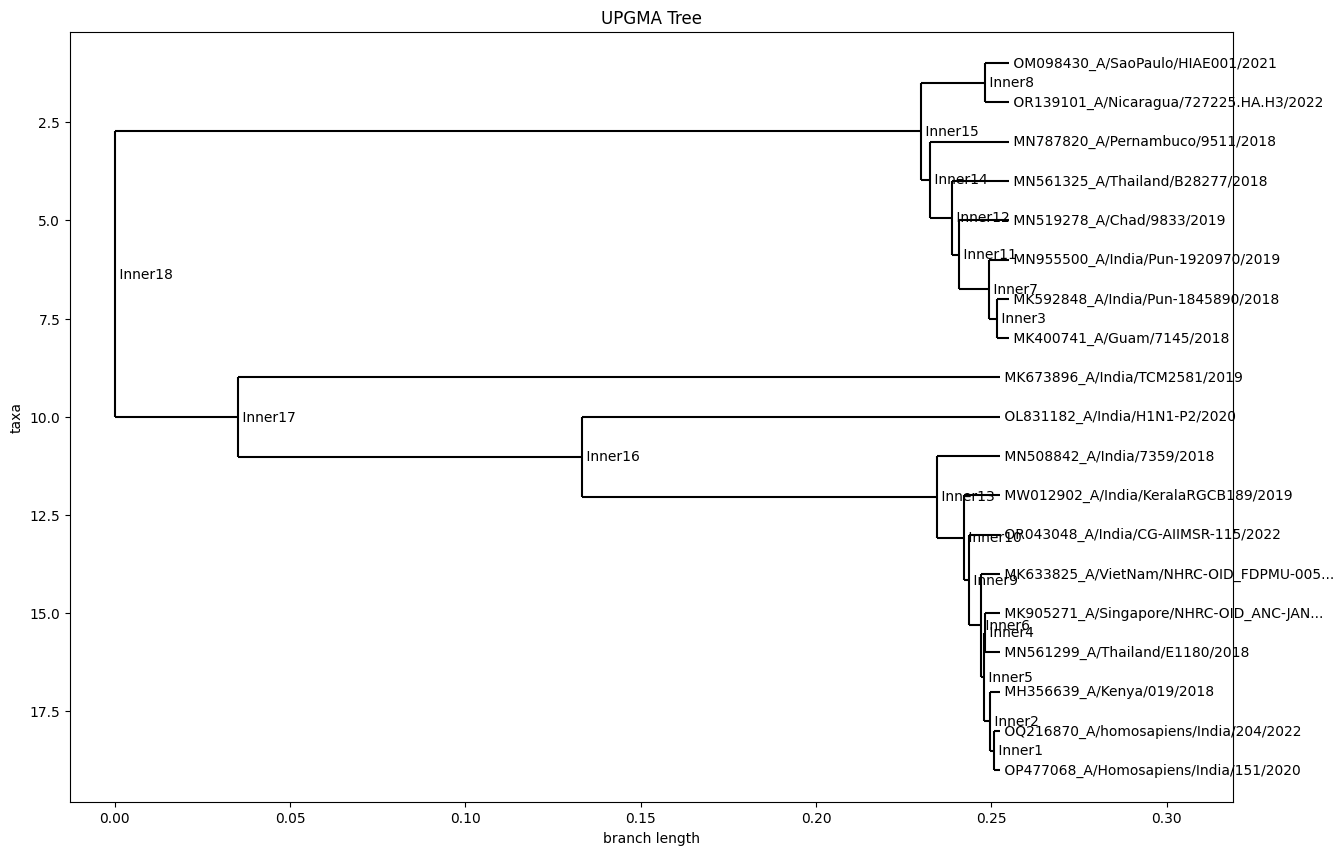

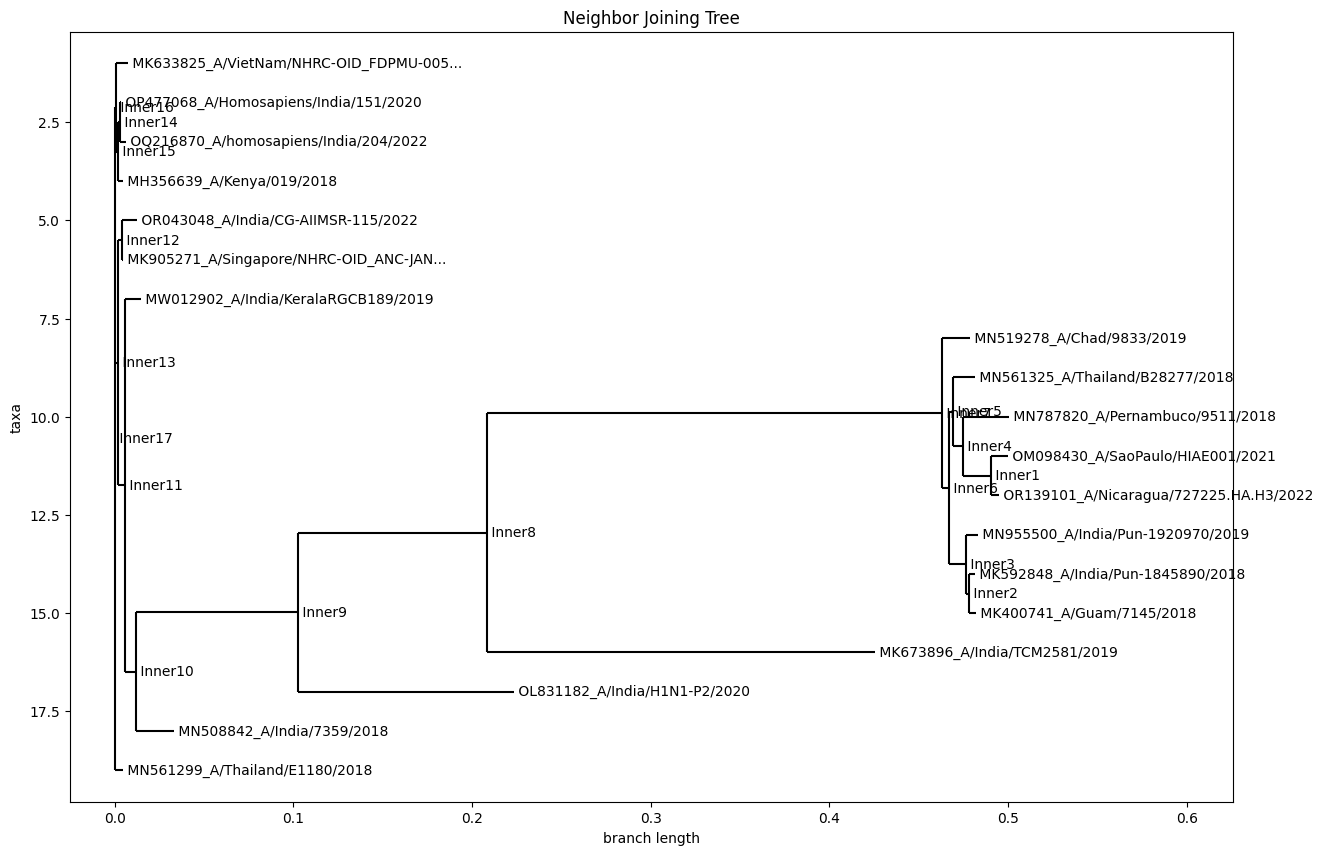

In [ ]:
import matplotlib.pyplot as plt

# Draw the phlyogenetic tree
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("UPGMA Tree")
Phylo.draw(UPGMATree, axes=ax)

# Draw the phlyogenetic tree using terminal
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Neighbor Joining Tree")
Phylo.draw(NJTree, axes=ax)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
df_distmatrix = pd.DataFrame(list(distMatrix), columns=distMatrix.names, index=distMatrix.names)

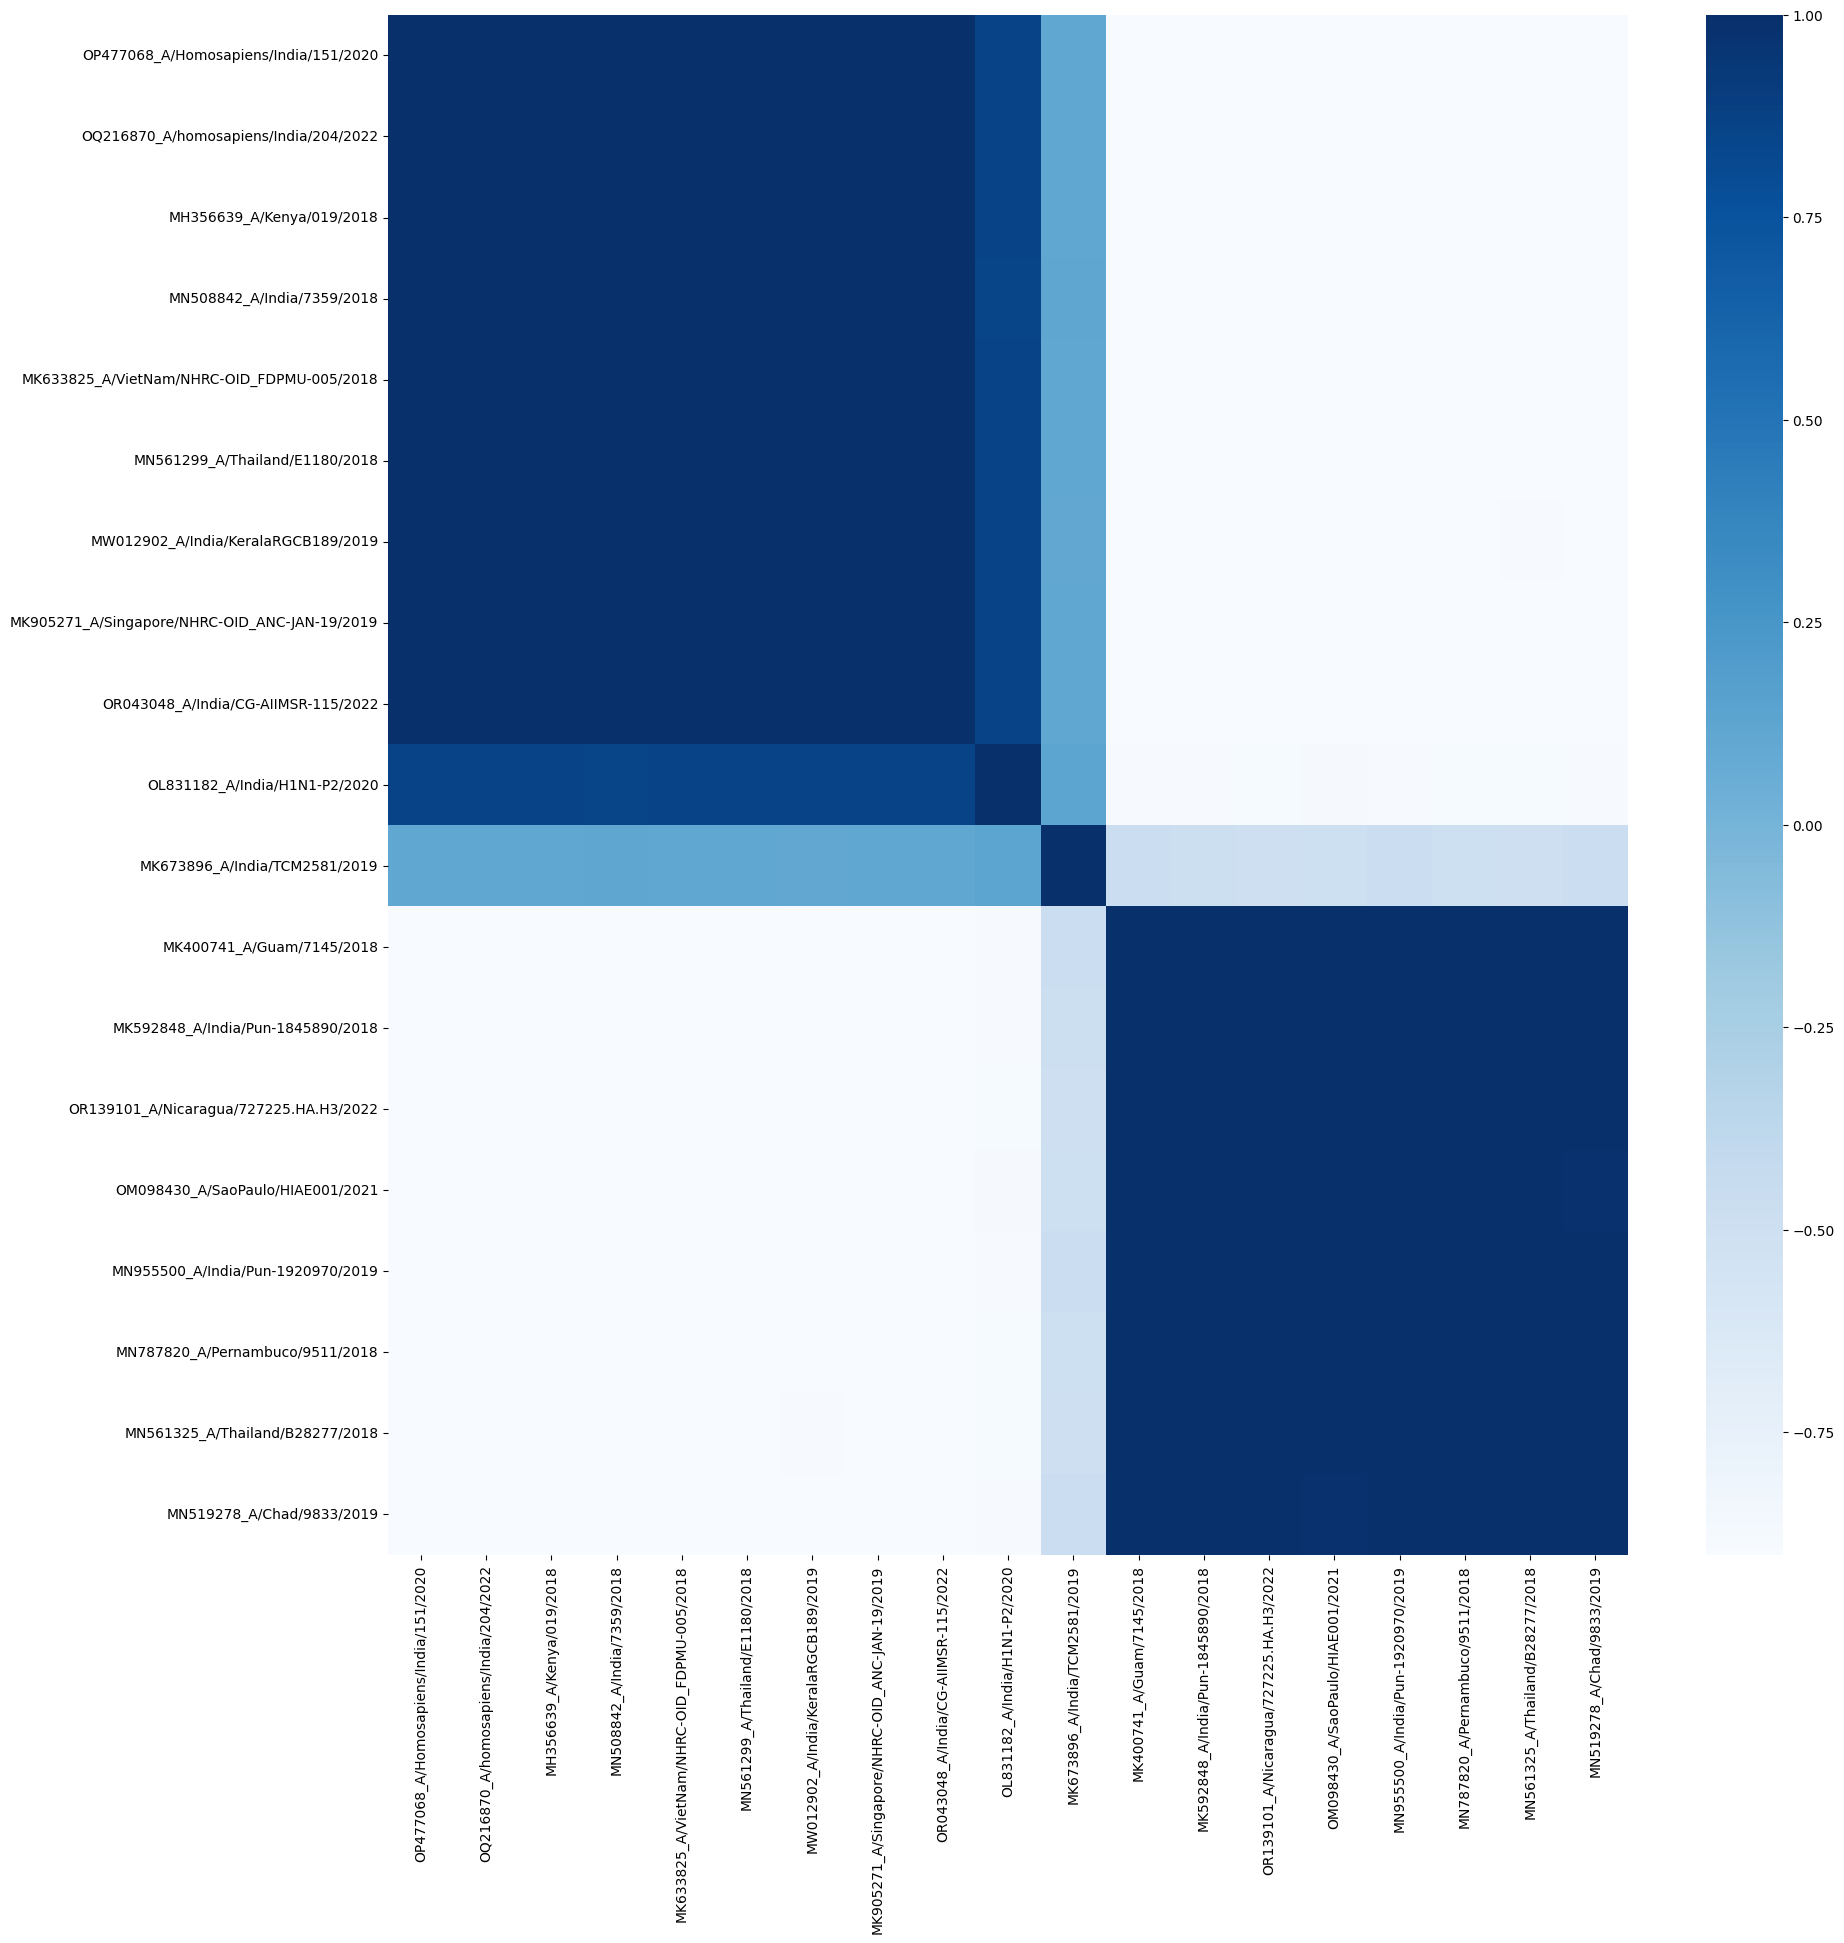

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
heatmap = sns.heatmap(
    df_distmatrix.corr(),
    # annot=True,
    cmap="Blues",
    fmt='.1g'
)
plt.rcdefaults()
plt.show()

Ref
- https://medium.com/@insidedna/biopython-to-retrieving-fasta-sequences-from-ncbi-databases-20e35772a25
- https://www.biostars.org/p/63506/#63510
- http://biopython.org/DIST/docs/tutorial/Tutorial.html
- http://scikit-bio.org/docs/0.2.1/index.html
- https://medium.com/geekculture/phylogenetic-trees-implement-in-python-3f9df96c0c32

In [ ]:
# Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
NA_path = "/content/NA_Flu.fa"

sequences_ = []
for seq_record in SeqIO.parse(NA_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(NA_path, "fasta"))

MN519282_A/Chad/9833/2019
Seq('ATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCTCTCACCATTTCC...TAA') - 1410
MK400907_A/Guam/7145/2018
Seq('ATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCTCTCACAATTTCC...TAA') - 1410
OP604269_A/Homosapiens/India/151/2022
Seq('TTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTCGATCTGTATGACAA...TTC') - 1422
MN508976_A/India/7359/2018
Seq('ATGAATCCCAACCAAAAGATAATAACCATTGGTTCGATCTGTATGACAATTGGA...TAA') - 1410
OR043050_A/India/CG-AIIMSR-115/2022
Seq('AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTCTATCTGTATGA...ACT') - 1433
OL831184_A/India/H1N1-P2/2020
Seq('AGCAAAAGCAGGAGTTTAAATGAATCCAAACCAGAAAATAATAACCATTGGGTC...ACC') - 1409
MW012885_A/India/KeralaRGCB189/2019
Seq('ATGAATCCAAACCAAAAGATAATAACCATTGGTTCTATCTGTATGACAATTGGA...TAA') - 1410
MH681578_A/India/Pun-1844612/2018
Seq('ATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCTCTCACAATTTCC...TTT') - 1424
MH685478_A/India/Sri-1844661/2018
Seq('ATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCTCTCACAATTTCC...TTT') - 1424
MK673898_A/India/TCM2581/2019
Seq('ATG

In [ ]:
#Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
ClustalNA_path = "/content/clustalw_NA.fasta"

sequences_ = []
for seq_record in SeqIO.parse(ClustalNA_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(ClustalNA_path, "fasta"))

OP604269_A/Homosapiens/India/151/2022
Seq('--------------TTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MN561301_A/Thailand/E1180/2018
Seq('-------------TTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MK633827_A/VietNam/NHRC-OID_FDPMU-005/2018
Seq('-----------AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MH356650_A/Kenya/019/2018
Seq('-----------AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MN508976_A/India/7359/2018
Seq('-------------------ATGAATCCCAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MW012885_A/India/KeralaRGCB189/2019
Seq('-------------------ATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
OR043050_A/India/CG-AIIMSR-115/2022
Seq('-----------AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
OQ216797_A/homosapiens/India/204/2022
Seq('-----------AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
MK905273_A/Singapore/NHRC-OID_ANC-JAN-19/2019
Seq('-----------AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTC...---') - 1487
OL83

In [ ]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
align = AlignIO.read(ClustalNA_path, "fasta")

distMatrix = calculator.get_distance(align)
print(distMatrix)

OP604269_A/Homosapiens/India/151/2022   0.000000
MN561301_A/Thailand/E1180/2018  0.011432    0.000000
MK633827_A/VietNam/NHRC-OID_FDPMU-005/2018  0.010087    0.009415    0.000000
MH356650_A/Kenya/019/2018   0.010760    0.010087    0.006052    0.000000
MN508976_A/India/7359/2018  0.012777    0.024210    0.022865    0.023537    0.000000
MW012885_A/India/KeralaRGCB189/2019 0.016140    0.027572    0.026227    0.026227    0.011432    0.000000
OR043050_A/India/CG-AIIMSR-115/2022 0.018830    0.018157    0.014122    0.014122    0.030262    0.025555    0.000000
OQ216797_A/homosapiens/India/204/2022   0.014122    0.013450    0.009415    0.009415    0.025555    0.020847    0.007397    0.000000
MK905273_A/Singapore/NHRC-OID_ANC-JAN-19/2019   0.015467    0.014795    0.010760    0.010760    0.026900    0.020847    0.007397    0.004035    0.000000
OL831184_A/India/H1N1-P2/2020   0.234028    0.234028    0.227976    0.229993    0.243443    0.244116    0.236718    0.232683    0.234028    0.000000
MN5192

In [ ]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)

# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

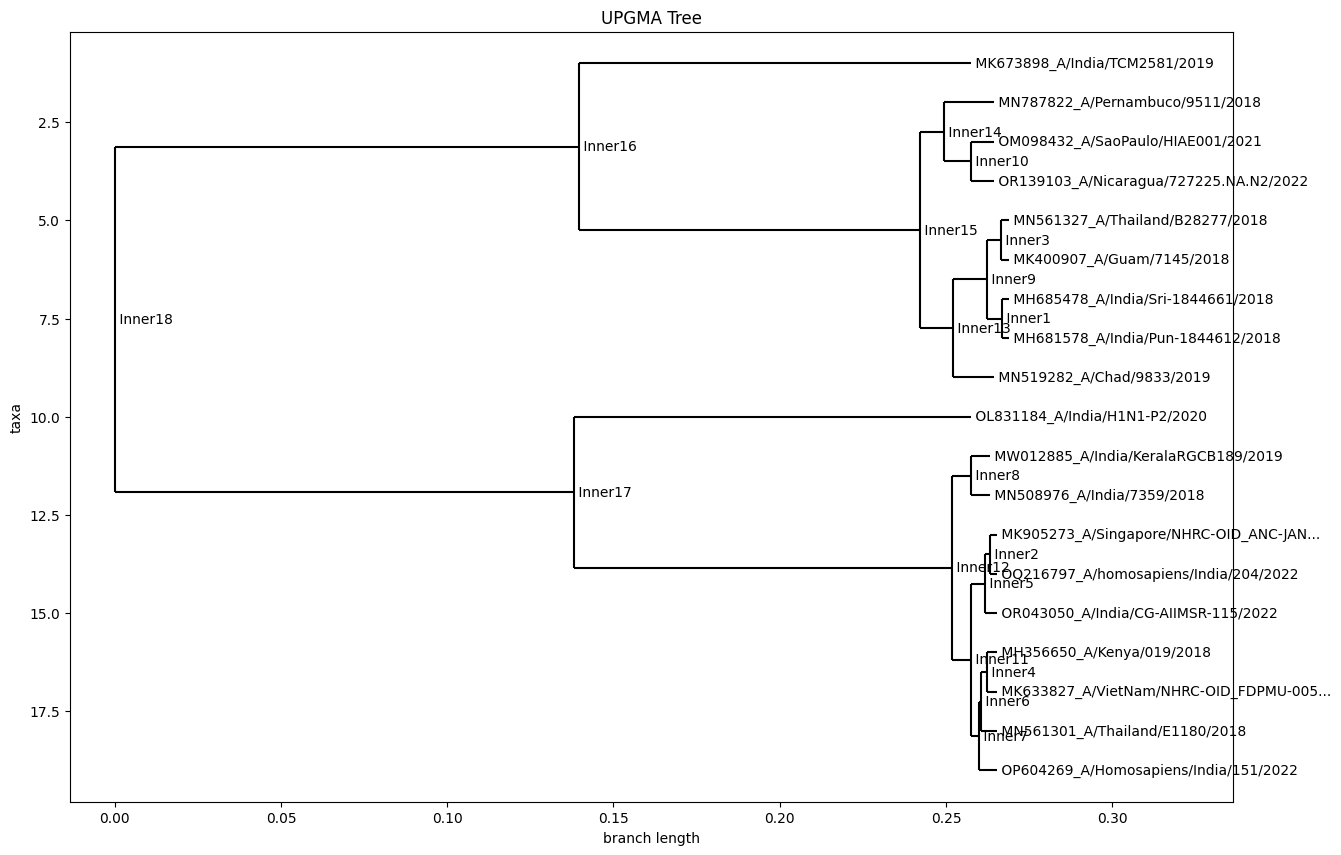

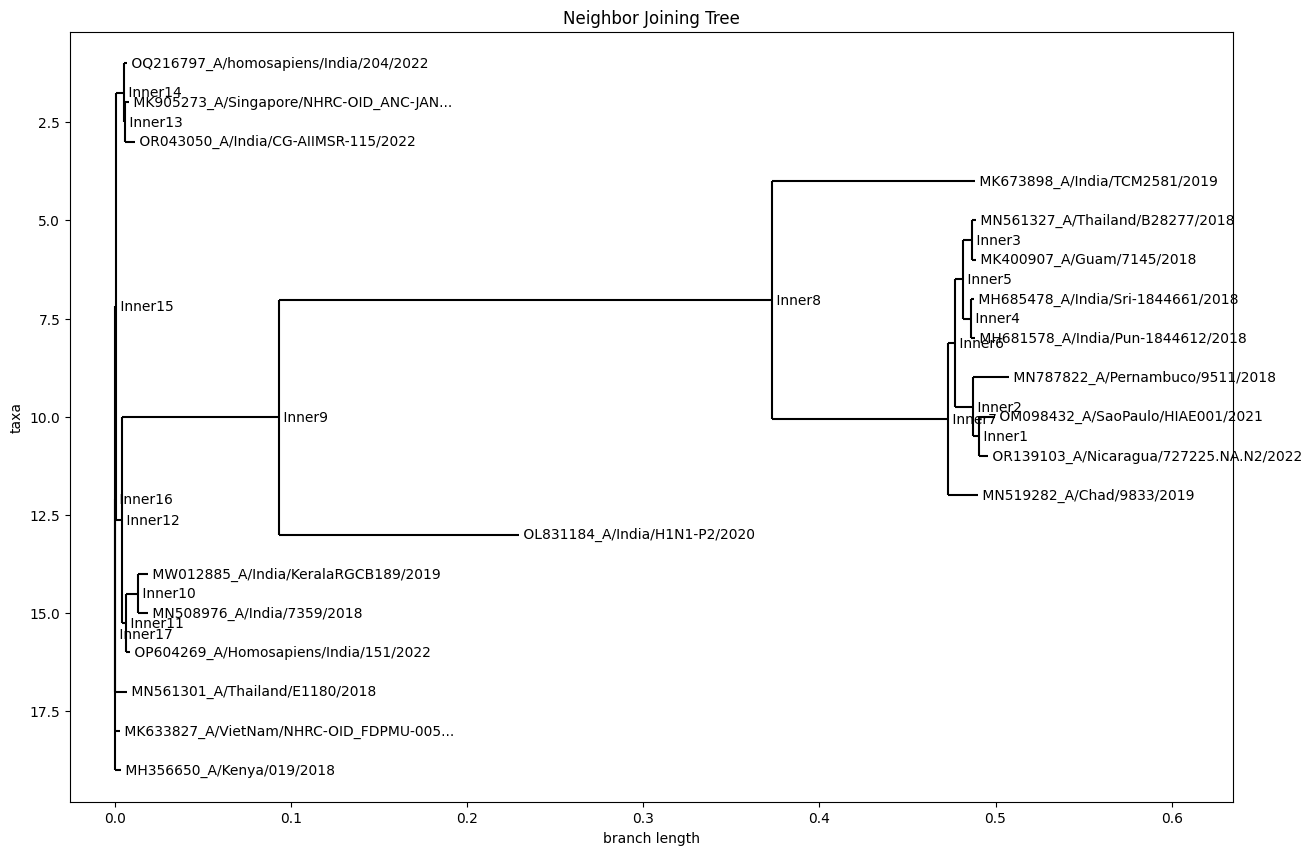

In [ ]:
import matplotlib.pyplot as plt

# Draw the phlyogenetic tree
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("UPGMA Tree")
Phylo.draw(UPGMATree, axes=ax)

# Draw the phlyogenetic tree using terminal
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Neighbor Joining Tree")
Phylo.draw(NJTree, axes=ax)

In [ ]:
df_distmatrix = pd.DataFrame(list(distMatrix), columns=distMatrix.names, index=distMatrix.names)

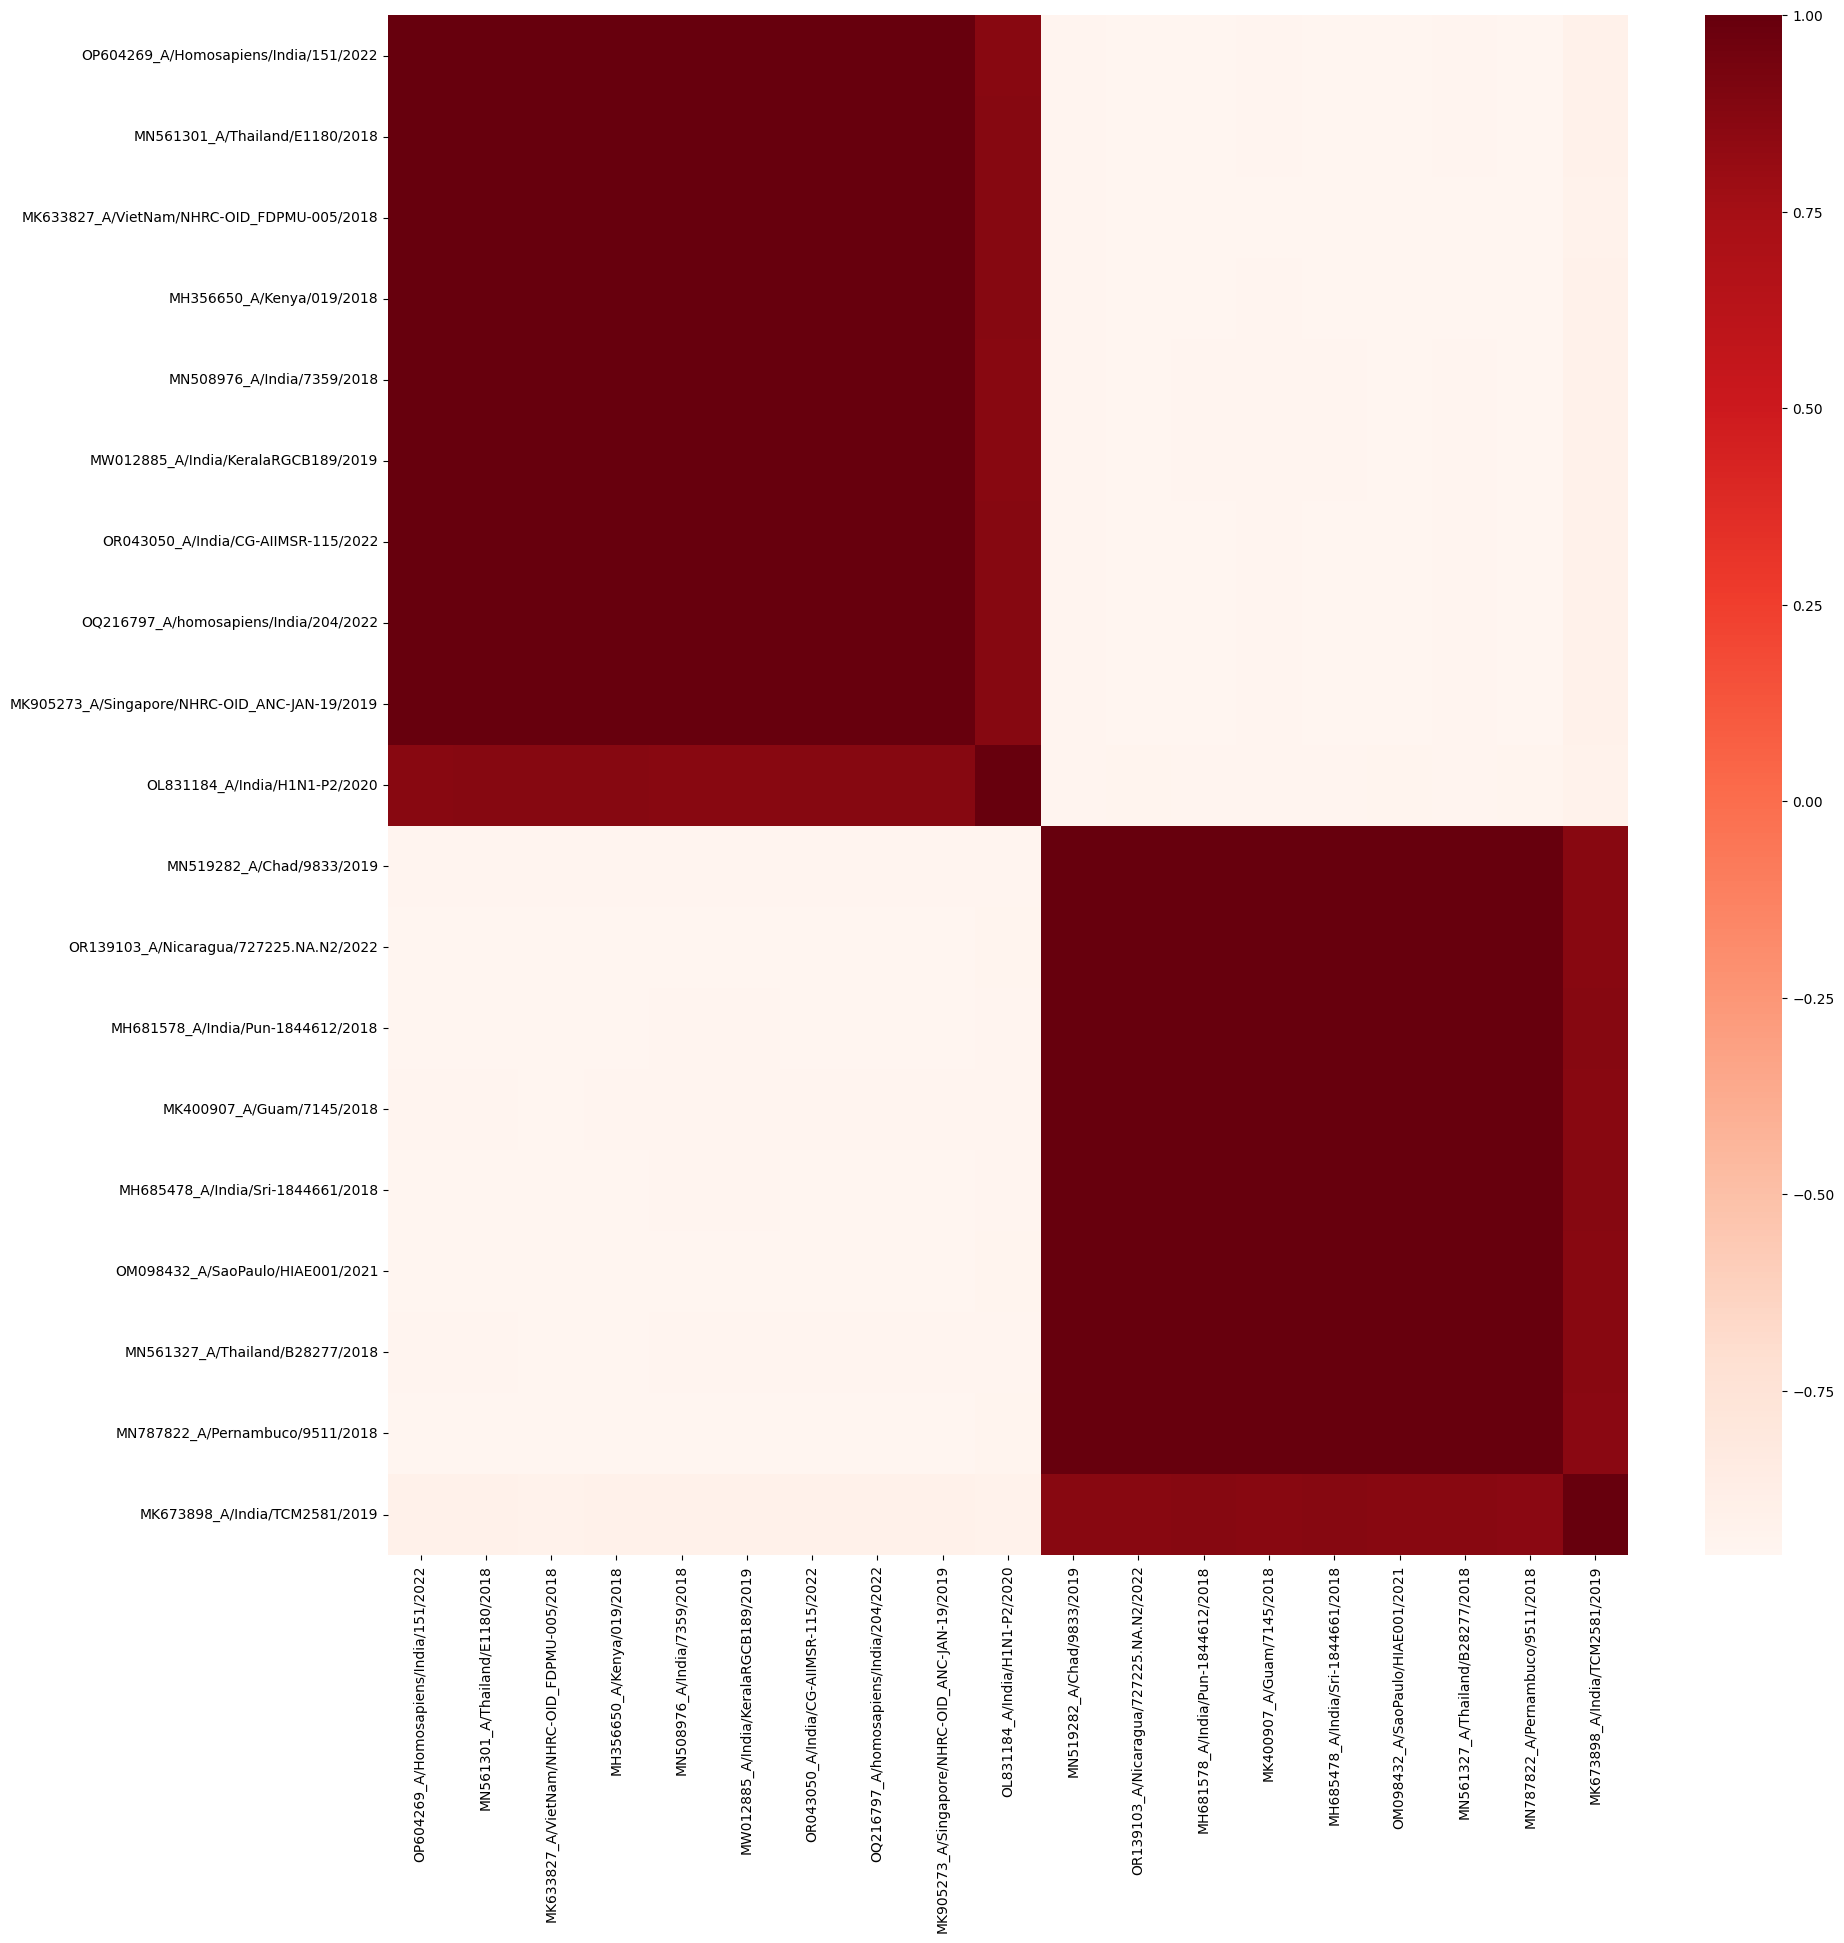

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
heatmap = sns.heatmap(
    df_distmatrix.corr(),
    # annot=True,
    cmap="Reds",
    fmt='.1g'
)
plt.rcdefaults()
plt.show()